# <div class="alert alert-info"> Afisha - OPTIMIZE MARKETING EXPENSES
</div>

<div class="alert alert-info"> The following analysis will be done to test the pros and cons from different point of views and when do we need to get the most right buissness decision.
looking at the number as a whole is the most important part.
As later in this analysis we will notice for example to differences between gross revenue to net revenue

LTV provide us partial information and we should always take into our buissness decisions the costs as our main goal is that our product will be profitable - one of the main goals of a stakeholder as well
</div>

# Step 1. Download the data and prepare it for analysis

<div class="alert alert-info"> we will make a quick look into the data sets of each csv file seperatley 

main check is to avoid dupps if any arrives and overall look of the data. for each data set has its own title

more logic tests will be in step 2 with the ref: "# logic test" in code cell
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates
from datetime import datetime
import seaborn as sns
%matplotlib inline

In [2]:
# import datasets
costs = pd.read_csv('/content/costs_us.csv', parse_dates=['dt'],dtype={'source_id':'category'})
# costs = pd.read_csv('/datasets/costs_us.csv', parse_dates=['dt'],dtype={'source_id':'category'})
orders = pd.read_csv('/content/orders_log_us.csv',parse_dates=['Buy Ts'])
# orders = pd.read_csv('/datasets/orders_log_us.csv',parse_dates=['Buy Ts'])
visits = pd.read_csv('/content/visits_log_us.csv',dtype={'Device':'category','Source Id':'category'},parse_dates=['End Ts','Start Ts'])
# visits = pd.read_csv('/datasets/visits_log_us.csv',dtype={'Device':'category','Source Id':'category'},parse_dates=['End Ts','Start Ts'])

## costs

In [3]:
# start with costs
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   category      
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 42.7 KB


In [4]:
costs.drop_duplicates(inplace=True) # in case there is any dupps

In [5]:
costs.describe()
# max value 10 times higher than the 3rd quartile (75%)

,costs
count,2542.000000
mean,129.477427
std,156.296628
min,0.540000
25%,21.945000
50%,77.295000
75%,170.065000
max,1788.280000


In [6]:
costs['source_id'].sort_values().value_counts(normalize=True)
# a look into distribution per source id

5     0.143194
9     0.142801
4     0.142801
3     0.142801
2     0.142801
10    0.142801
1     0.142801
Name: source_id, dtype: float64

In [7]:
costs.head(5)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


## orders

In [8]:
# orders data
orders.info()
# no nan values here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [9]:
# cols lower case
orders.columns = [x.lower() for x in orders.columns]

In [10]:
# replace col with _ in cols name
orders.columns = orders.columns.str.replace(" ","_") 

In [11]:
orders.drop_duplicates(inplace=True)

In [12]:
orders.columns
# look into cols names, keep consistancy between the tables

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

In [13]:
orders.head(5)
# just a look:

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


## visits

In [14]:
# visits
visits.info()
# we have on row with only device col so we will remove it 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  category      
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(2), datetime64[ns](2), uint64(1)
memory usage: 8.9 MB


In [15]:
visits.dropna(inplace=True) # drop row with na values

In [16]:
visits['Uid'] = visits['Uid'].astype('uint64') # define uint64 type for Uid columns

In [17]:
visits.columns = [x.lower() for x in visits.columns] # same as before - lower case cols names

In [18]:
visits.columns = visits.columns.str.replace(" ","_") # replace " " with _

In [19]:
visits.drop_duplicates(inplace=True)

In [20]:
visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

In [21]:
# lets confirm logic data:
visits[visits['end_ts'] < visits['start_ts']] 
# these 2 rows should be reverted to the responsible team so in the project I will delete these rows from data

,device,end_ts,source_id,start_ts,uid
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453


In [22]:
visits = visits[visits['end_ts'] >= visits['start_ts']] 

In [23]:
visits.shape[0]
# ok

359398

In [24]:
visits.describe(include=['datetime64[ns]','category']) # looks ok

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,device,end_ts,source_id,start_ts
count,359398,359398,359398,359398
unique,2,224759,9,224301
top,desktop,2017-11-24 16:51:00,4,2017-11-24 16:06:00
freq,262565,23,101794,19
first,NaN,2017-06-01 00:02:00,NaN,2017-06-01 00:01:00
last,NaN,2018-06-01 01:26:00,NaN,2018-05-31 23:59:00


In [25]:
visits.head(5)

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


# Step 2. Make reports and calculate metrics

## Product

In [26]:
# lets have a look at the time span of visits table:
print('start: {}'.format(visits['start_ts'].min()))
print('end date: {}'.format(visits['start_ts'].max()))

start: 2017-06-01 00:01:00
end date: 2018-05-31 23:59:00


In [27]:
# now add new columns segregating the periods of time in each col and next use to groupby next:
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['session_week'] = visits['start_ts'].astype('datetime64[W]')
visits['session_date'] = visits['start_ts'].dt.date.astype('datetime64[ns]')
visits.head(3)

,device,end_ts,source_id,start_ts,uid,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01


### *o*	How many people use it every day, week, and month?


#### dau

In [28]:
# daily, weekly and monthly unique users:
dau = visits.groupby('session_date').agg({'uid':'nunique'}).reset_index()[['session_date','uid']]
dau.columns = ['session_date','unique_users']
dau.head(5)

,session_date,unique_users
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820


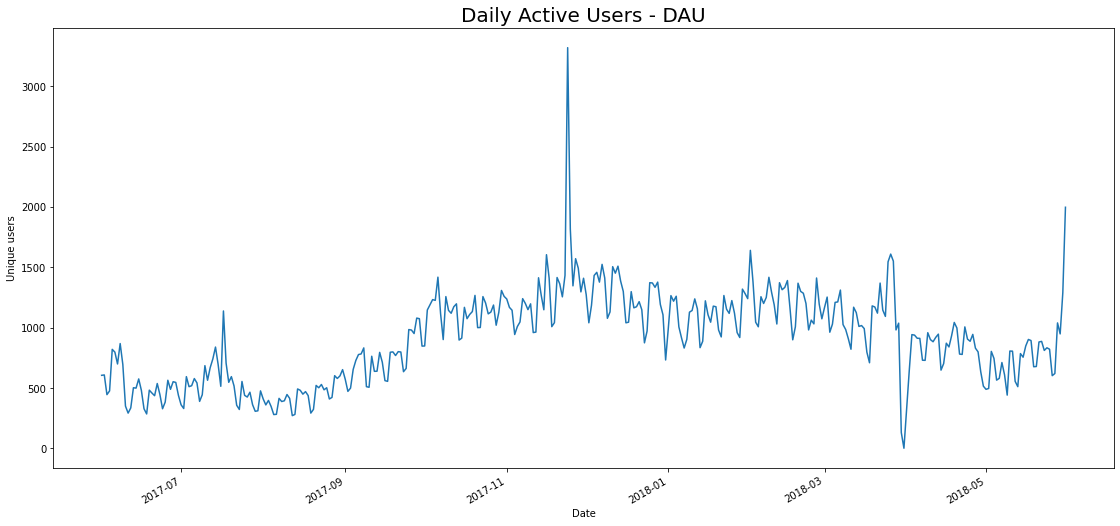

In [29]:
plt.figure(figsize=(19,9),facecolor='white')
plt.plot(dau.session_date,dau.unique_users)
plt.title('Daily Active Users - DAU',fontdict={'fontsize':20})
plt.xlabel('Date')
plt.ylabel('Unique users')
plt.gcf().autofmt_xdate()

In [30]:
# looking at 2 big jumps on the grapgh:
dau.nlargest(2,['unique_users'])

,session_date,unique_users
176,2017-11-24,3319
363,2018-05-31,1997


In [31]:
# looking @ lowest point in the graph:
dau.nsmallest(1,['unique_users'])

,session_date,unique_users
303,2018-03-31,1


- dau we can see the users behaviour with daily changes

- a slight increase over time till the middle of the year that after this we can see some stignition a dau is not changes drasticaly

- also might be good to ignore the big 3 outliners - nlargest + nsmallest

#### wau

In [32]:
wau = visits.groupby('session_week').agg({'uid':'nunique'}).reset_index()[['session_week','uid']]
wau.columns = ['session_week','unique_weekly_users']
wau.head(5)

,session_week,unique_weekly_users
0,2017-06-01,4082
1,2017-06-08,3311
2,2017-06-15,2844
3,2017-06-22,3079
4,2017-06-29,3055


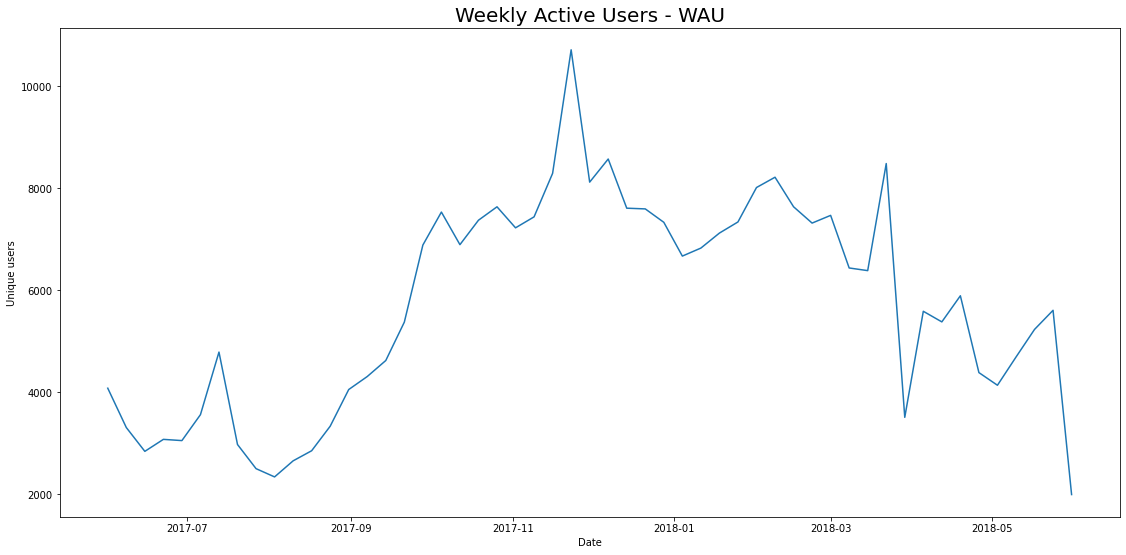

In [33]:
plt.figure(figsize=(19,9),facecolor='white')
plt.title('Weekly Active Users - WAU',fontdict={'fontsize':20})
plt.xlabel('Date')
plt.ylabel('Unique users')
plt.plot(wau.session_week,wau.unique_weekly_users)

In [34]:
wau.nlargest(1,['unique_weekly_users']) # highest point

,session_week,unique_weekly_users
25,2017-11-23,10716


In [35]:
wau.nsmallest(2,'unique_weekly_users') # lowest 2 points

,session_week,unique_weekly_users
52,2018-05-31,1997
9,2017-08-03,2343


- from a weekly point of few the variance is higher and as we can see the changes is with higher impact when the lowest point is in the final week of the period while the highest is in the end of Nov-17 whereas the biggest unique users in dau graph

#### mau

In [36]:
mau = visits.groupby('session_month').agg({'uid':'nunique'}).reset_index()[['session_month','uid']]
mau.columns = ['month','unique_monthly_users']
mau

,month,unique_monthly_users
0,2017-06-01,13259
1,2017-07-01,14183
2,2017-08-01,11631
3,2017-09-01,18975
4,2017-10-01,29692
5,2017-11-01,32797
6,2017-12-01,31557
7,2018-01-01,28716
8,2018-02-01,28749
9,2018-03-01,27473


Text(0, 0.5, 'Unqique users')

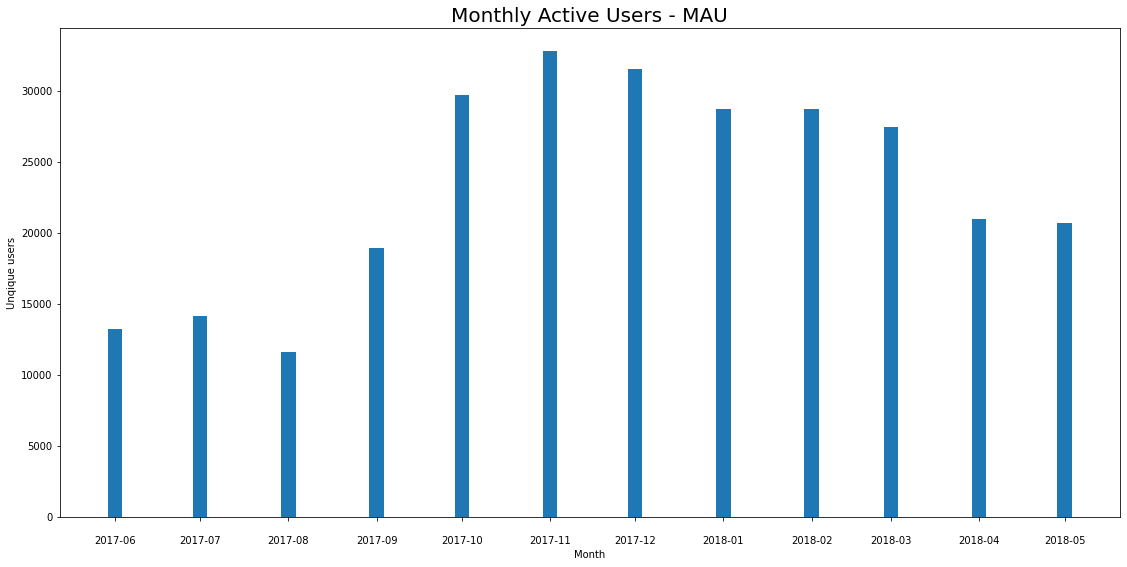

In [37]:
plt.figure(figsize=(19,9),facecolor='white')
ax = plt.subplot()
ax.bar(mau.month,mau.unique_monthly_users, width=5)
ax.set_xticks(mau.month)
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("\n%Y-%m"))
ax.set_title("Monthly Active Users - MAU",fontdict={'fontsize':20})
ax.set_xlabel('Month')
ax.set_ylabel('Unqique users')
# plt.gcf().autofmt_xdate()

- from a monthly point of few we can notice for increase of unique users 
- pick reached in Nov-17 when til the end of the period we see a decline

### o	How many sessions are there per day? (One user might have more than one session.)


In [38]:
# group by each day and count the start of session. next average value calculated
session_per_day = int(visits.groupby('session_date').agg({'start_ts':'count'}).reset_index()['start_ts'].mean())
print('average visits per day: {}'.format(session_per_day))

average visits per day: 987


### o	What is the length of each session?


1. First we add new columns with len of each session in minutes

2. Than get the average daily length session

In [39]:
# will have new column where we have our new data --->session length in minutes
visits['session_len_min'] = visits['end_ts'] - visits['start_ts']
visits.head(5)

,device,end_ts,source_id,start_ts,uid,session_month,session_week,session_date,session_len_min
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-14,2017-12-20,0 days 00:18:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02-15,2018-02-19,0 days 00:28:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0 days 00:00:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-05-17,2018-05-20,0 days 00:24:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,2017-12-21,2017-12-27,0 days 00:00:00


In [40]:
# convert new columns from timedelda type to int:
visits['session_len_min'] = visits['session_len_min'] / np.timedelta64(1,'m')
visits['session_len_min'] = visits['session_len_min'].astype('int')

In [41]:
daily_mean_len = visits.groupby('session_date')['session_len_min'].mean().mean()
print('daily average length session of a user: {} minutes'.format(int(daily_mean_len)))

daily average length session of a user: 10 minutes


one more look to this freme of users length session but for those who's session = 0

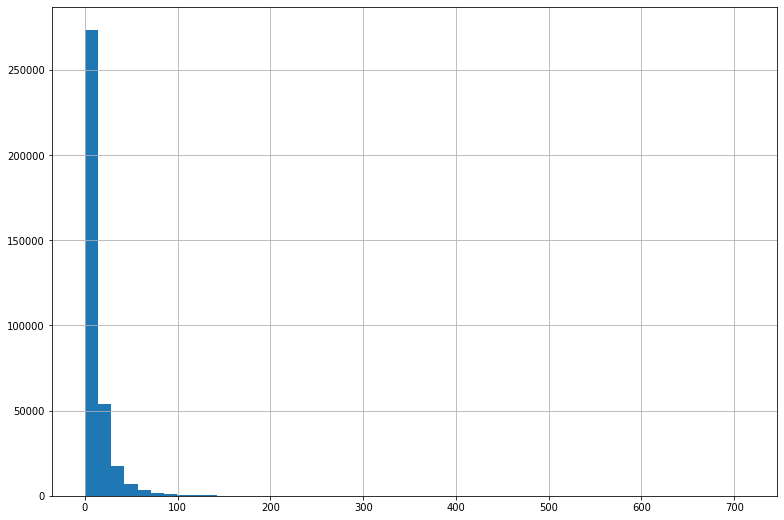

In [42]:
visits['session_len_min'].hist(bins=50,figsize=(13,9))

In [43]:
# lets dive into 0's only:
visits[visits['session_len_min'] == 0]['session_len_min'].count()

36662

apprx 360k records when out of them about 36.5k "empty" entries with less than a minute monitored.
probably it might be because of wrongly entered to the browser or any other logical reason 

next I will plot a graph showing total time session for each day per device

In [44]:
device_session_len = visits.groupby(['device','session_date']).agg({'session_len_min':'sum'}).reset_index() # grouping

In [45]:
device_session_len.head(5)

,device,session_date,session_len_min
0,desktop,2017-06-01,6047.0
1,desktop,2017-06-02,5197.0
2,desktop,2017-06-03,3737.0
3,desktop,2017-06-04,3427.0
4,desktop,2017-06-05,7794.0


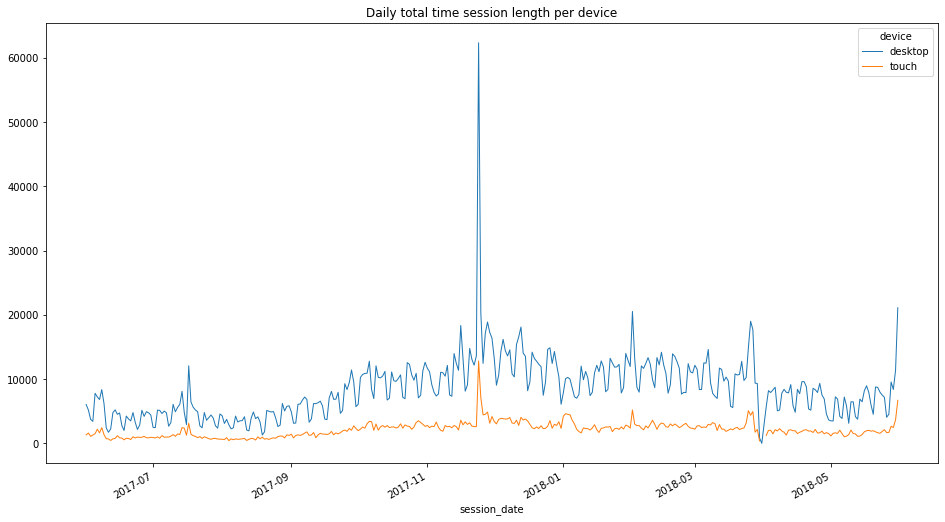

In [46]:
device_session_len.pivot('session_date','device','session_len_min').plot(
    title='Daily total time session length per device',figsize=(16,9),linestyle='-',linewidth=1,marker='')

- most of the traffic is from desktop
- a nice look into the distribution for each device
- user behaviour do not change much and a correlation is noticed between the 2 device by only a quick look at the plot result

In [47]:
# get the most frequnt source_id for each user and last entrance if user entered from many sources the same number of time:
source_id_per_user = visits.pivot_table(index='uid',values='source_id',aggfunc=lambda x: x.mode().iat[-1]).reset_index()

In [48]:
source_id_per_user.columns = ['uid','main_source_id']


 <div class="alert alert-info"><b>Hi Andrey, please note that 'source_id_per_user' will not be used but in the next note</b>  </div>

### o	How often do users come back?


here we check ther retention rates for monthly cohorts 

In [49]:
# make new table with first visit by months terms only:
first_visit_month = visits.groupby("uid")['session_month'].min()

In [50]:
# rename cols:
first_visit_month.name = 'first_session_month'

In [51]:
# I duplicated the original visits table for this part I will use visits_
visits_ = visits

In [52]:
# joining visits_ with the first visit by month:
visits_ = visits_.join(first_visit_month,on='uid')

In [53]:
# create cohorts lifetime in months terms:
visits_['cohort_lifetime'] = visits_['session_month'] - visits_['first_session_month'] # months passed from current to 1st session
visits_['cohort_lifetime'] = visits_['cohort_lifetime'] / np.timedelta64(1,'M') # convert cohorts lifetimes into months
visits_['cohort_lifetime'] = visits_['cohort_lifetime'].astype(int)  # set it by 'int' varaibales

In [54]:
# build a cohorts variable to use further in pivot
cohorts = visits_.groupby(['first_session_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 

In [55]:
# comparison made from the 0 time passed period so we get only the users whos next visits was on the same month
initial_uid_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_session_month','uid']]

In [56]:
# small col rename:
initial_uid_count.rename(columns={'uid':'cohort_users_0'},inplace=True) 

In [57]:
# merge into cohorts the ones whos cohorts time is 0
cohorts = cohorts.merge(initial_uid_count,on='first_session_month')

In [58]:
cohorts.rename(columns={'uid':'n_users_cohorts'},inplace=True)

In [59]:
# get our retention rate:
cohorts['retention'] = cohorts['n_users_cohorts']/cohorts['cohort_users_0']

In [60]:
retention_pivot = cohorts.pivot_table(index='first_session_month',columns='cohort_lifetime',values='retention',aggfunc='sum')

[Text(0, 0.5, '2017-06'),
 Text(0, 1.5, '2017-07'),
 Text(0, 2.5, '2017-08'),
 Text(0, 3.5, '2017-09'),
 Text(0, 4.5, '2017-10'),
 Text(0, 5.5, '2017-11'),
 Text(0, 6.5, '2017-12'),
 Text(0, 7.5, '2018-01'),
 Text(0, 8.5, '2018-02'),
 Text(0, 9.5, '2018-03'),
 Text(0, 10.5, '2018-04'),
 Text(0, 11.5, '2018-05')]

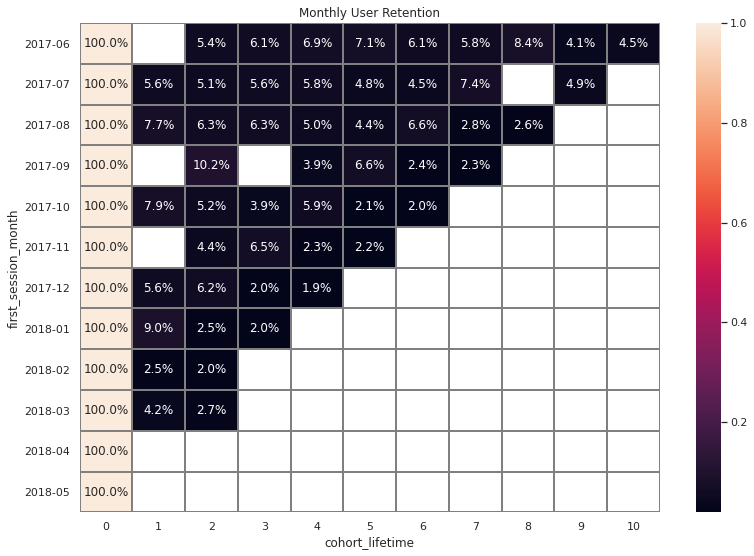

In [61]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Monthly User Retention')
sns.heatmap(retention_pivot,
            annot=True,
            fmt='.1%',
            linewidths=1,
            linecolor='gray').set_yticklabels(retention_pivot.index.strftime('%Y-%m'))

- 0 life time is 100% too all month session since it is only divided buy it self and our retention rates start from the 1st cohorts
- the highest retention was noted in September with 2 cohortsliftime which compared to rest of retentions this one seems to be high in relative manners 
- I decided to leave the empty cells blank and not fill with 0 to emphasize the other retention. easily we can notice that was zero was dominant in cohorts where we expected to see some retention buy actually retention was 0% - bad figures and should be checked by managers
- on the 1st cohort when looking vertically we can assume that seasonality may take effect on this results while starting with 0 going up in the next months and then going down and so on
- overall I think its fair to say that once time passed the users come back in low rates which can impact the Afisha preformances

## sales

### o	When do people start buying? (In KPI analysis, we're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer. 
For example, if registration and the first purchase occur on the same day, the user might fall into category Conversion 0d. If the first purchase happens the next day, it will be Conversion 1d. You can use any approach that lets you compare the conversions of different cohorts, so that you can determine which cohort, or marketing channel, is most effective.)


In [62]:
# logical test:
orders[orders['revenue'] <= 0].count()

buy_ts     51
revenue    51
uid        51
dtype: int64

- there are number of orders with no revenue (=0)
- we can assume that the user made an order to something that was free/discount so the revenue is 0

In [63]:
# a look into uid col in orders 
orders['uid'].value_counts()
# there are customers that made more than 1 oder

3644482766749211722     239
13888745432979765063    238
11920452646463905188    227
6731421022966725351     183
5139615590553126732     150
                       ... 
10123118655365033769      1
17398492294358629398      1
15974676665349104064      1
16705253310465048548      1
9505264890679494151       1
Name: uid, Length: 36523, dtype: int64

__next I will find for each user his first purchase (from orders dataset) & first visit (visits data)__

In [64]:
first_visit = visits.groupby('uid')['start_ts'].min() # first visit
first_order = orders.groupby('uid')['buy_ts'].min() # first buy

In [65]:
# rename:
first_visit.name = 'first_visit_ts'
first_order.name = 'first_buy_ts'

In [66]:
first_visit_and_order = pd.concat([first_visit,first_order],axis=1,join='inner').reset_index()

In [67]:
first_visit_and_order.info() # small check on new df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36523 entries, 0 to 36522
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   uid             36523 non-null  uint64        
 1   first_visit_ts  36523 non-null  datetime64[ns]
 2   first_buy_ts    36523 non-null  datetime64[ns]
dtypes: datetime64[ns](2), uint64(1)
memory usage: 856.1 KB


In [68]:
# logical test:
first_visit_and_order[first_visit_and_order['first_visit_ts'] > first_visit_and_order['first_buy_ts']]
# ok here

,uid,first_visit_ts,first_buy_ts


In [69]:
first_visit_and_order.tail(1)

,uid,first_visit_ts,first_buy_ts
36522,18446167067214817906,2017-10-17 10:05:00,2017-10-17 10:16:00


In [70]:
# convert into dates into dates without ts
first_visit_and_order['first_visit_ts'] =  first_visit_and_order['first_visit_ts'].dt.date.astype('datetime64[ns]')
first_visit_and_order['first_buy_ts'] =  first_visit_and_order['first_buy_ts'].dt.date.astype('datetime64[ns]')

In [71]:
# add new col with diff from first visit to first buy:
first_visit_and_order['days_passed_to_buy'] = (first_visit_and_order['first_buy_ts'] - first_visit_and_order['first_visit_ts']) / np.timedelta64(1,'D')

In [72]:
# as int:
first_visit_and_order['days_passed_to_buy'] = first_visit_and_order['days_passed_to_buy'].astype('int')

In [73]:
# add the main source_id column so use conversion by source:
first_visit_and_order = first_visit_and_order.merge(source_id_per_user,on='uid')

In [74]:
first_visit_and_order.info() # look ok - eventhough the 4th columns is not defined as category we can proceed with our taks

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36523 entries, 0 to 36522
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   uid                 36523 non-null  uint64        
 1   first_visit_ts      36523 non-null  datetime64[ns]
 2   first_buy_ts        36523 non-null  datetime64[ns]
 3   days_passed_to_buy  36523 non-null  int64         
 4   main_source_id      36523 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 1.7+ MB


In [75]:
# pviot table to shouw mean days passed till first purchase and number of users
conversion_rate_first_buy = first_visit_and_order.pivot_table(index='main_source_id',values='days_passed_to_buy',aggfunc=['mean','count']).reset_index()

In [76]:
conversion_rate_first_buy.columns = ['main_source_id','mean_days_to_buy','n_users']
conversion_rate_first_buy.sort_values(by='mean_days_to_buy')

,main_source_id,mean_days_to_buy,n_users
6,7,0.000000,1
1,10,9.884432,1047
0,1,11.371920,2557
3,3,14.303340,8413
5,5,15.300570,8068
4,4,17.702341,10764
2,2,21.917845,3676
7,9,31.429644,1997


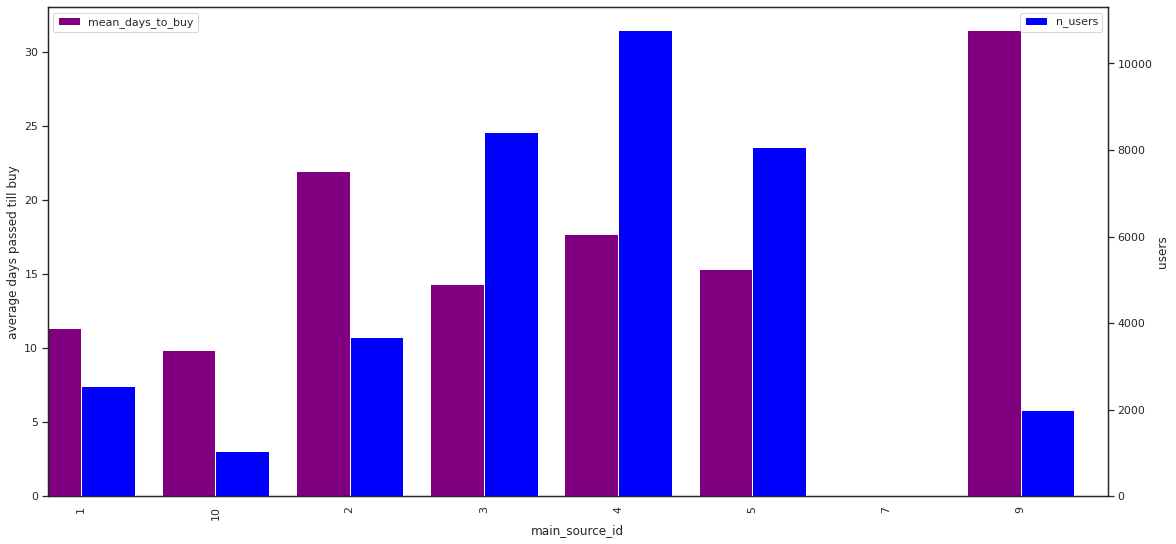

In [77]:
fig = plt.figure(figsize=(19,9)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

conversion_rate_first_buy.set_index('main_source_id').mean_days_to_buy.plot(kind='bar', color='purple', ax=ax, width=width, position=1,label='mean_days_to_buy')
conversion_rate_first_buy.set_index('main_source_id').n_users.plot(kind='bar', color='blue', ax=ax2, width=width, position=0,label='n_users')

ax.set_ylabel('average days passed till buy')
ax2.set_ylabel('users')
ax.legend()
ax2.legend(loc=0)
plt.show()

- only one user came from souce #7 and made a purchase on the same date
- most buyers came ffrom source #4 where is the mean days to purchase is about 17

### o	How many orders do they make during a given period of time?


In [78]:
# source_id_per_user
first_visit_and_order_days_passed = first_visit_and_order.groupby(['days_passed_to_buy','main_source_id'])['uid'].count().reset_index()
# orders

In [79]:
first_visit_and_order_days_passed.rename(columns={'uid':'purchase'},inplace=True)

(-1.0, 2.0)

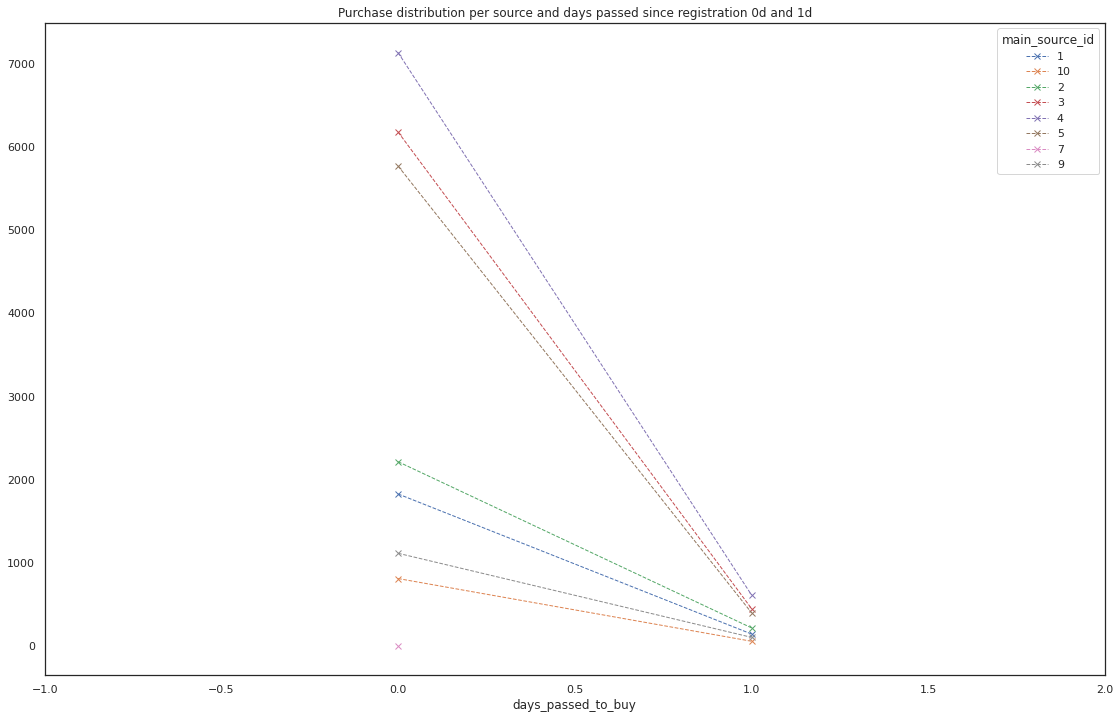

In [80]:
first_visit_and_order_days_passed.iloc[:15].pivot('days_passed_to_buy','main_source_id','purchase').plot(
    title='Purchase distribution per source and days passed since registration 0d and 1d',figsize=(19,12),linestyle='--',linewidth=1,marker='x')
plt.xlim((-1,2))

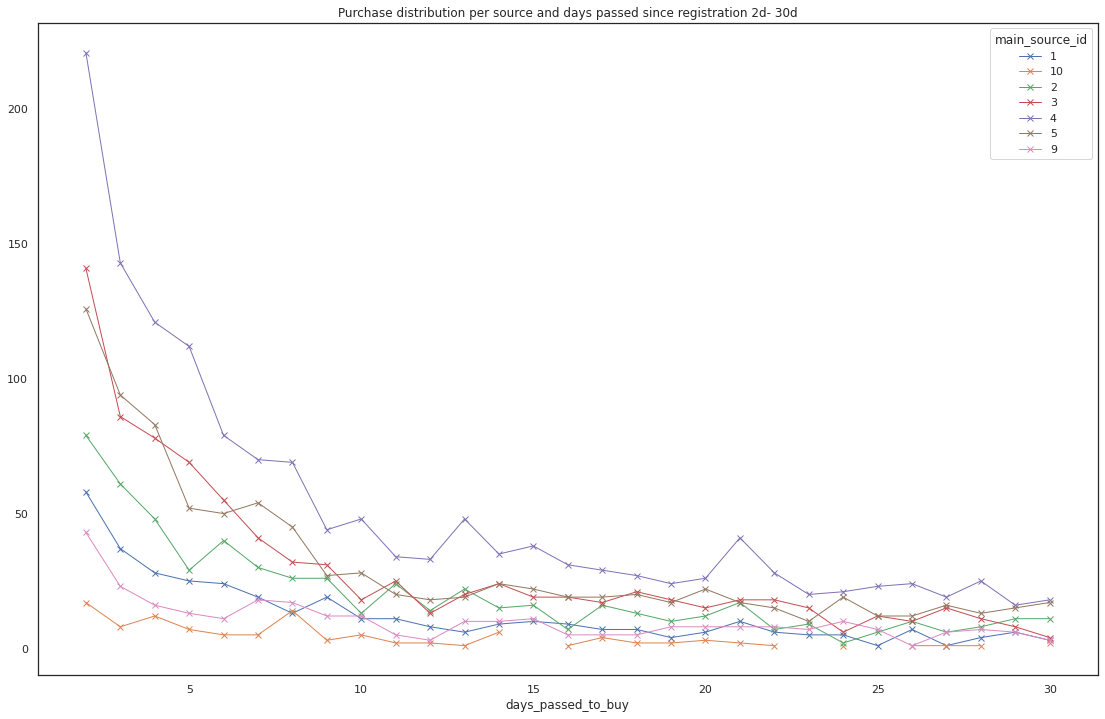

In [81]:
first_visit_and_order_days_passed.iloc[15:214].pivot('days_passed_to_buy','main_source_id','purchase').plot(
    title='Purchase distribution per source and days passed since registration 2d- 30d',figsize=(19,12),linestyle='-',linewidth=1,marker='x')


I've splitted the visualization into 2 periods
- in both the trends remain the same as source #4 (purple line) is on top for all time periods
- #10 is at the buttom for most of the time periods except period 0d
- as time passes the chance to make a purchase are getting lower which is the reason for declination for all the sources

### o	What is the average purchase size?


make it average purchase size for every time period (purchases from registration till purchase)

In [82]:
# add revenue column from orders (first purchase revenue per user)
first_order_revenue = orders.groupby('uid').agg({'revenue':'first'}).reset_index()

In [83]:
first_visit_and_order = first_visit_and_order.merge(first_order_revenue,on='uid')

In [84]:
revenue_pivot = first_visit_and_order.groupby('days_passed_to_buy').agg({'revenue':'mean'}).reset_index()

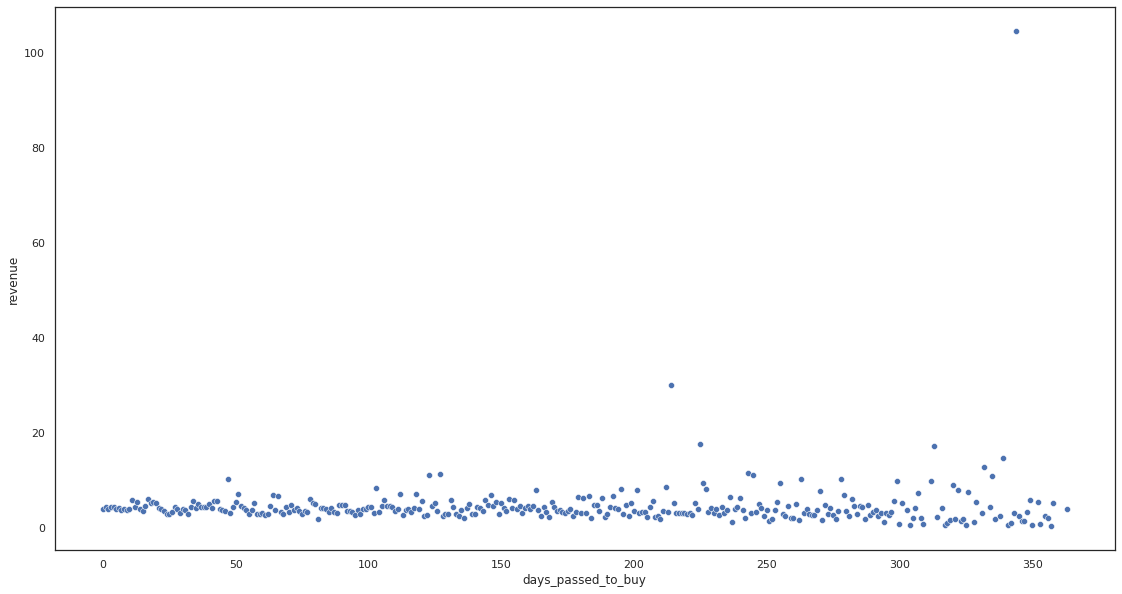

In [85]:
# scatter plot:
plt.figure(figsize=(19,10),facecolor='white')
sns.scatterplot(x='days_passed_to_buy',y='revenue',data=revenue_pivot)

- average revenue when days pass remain the same with no big differences except few outliners
- reminder that it is an average revenue - which is also indicator that the services offered stay the same through the year


### o	How much money do they bring? (LTV)


assumption - margin rate = 40%

In [86]:
margin_rate = 0.4

In [87]:
# month_order column:
orders['month_buy'] = orders['buy_ts'].astype('datetime64[M]')

In [88]:
# first order month to user:
first_order_month = orders.groupby('uid').agg({'month_buy':'min'}).reset_index()

In [89]:
first_order_month.rename(columns={'month_buy':'first_month_buy'},inplace=True)

In [90]:
# cohort define:
cohort_sizes = first_order_month.groupby('first_month_buy').agg({'uid':'nunique'}).reset_index()
cohort_sizes.columns = ['first_month_buy','n_buyers']

In [91]:
# orders add column of first month buy:
orders = orders.merge(first_order_month,on='uid')

In [92]:
# group orders into cohorts
cohorts = orders.groupby(['first_month_buy','month_buy']).agg({'revenue':'sum'}).reset_index()

In [93]:
# merge cohorts & cohorts_sizes
report = pd.merge(cohort_sizes,cohorts,on='first_month_buy') 

In [94]:
# gross profit calculation:
report['gp'] = report['revenue'] * margin_rate

In [95]:
# age in month term:
report['age'] = (report['month_buy'] - report['first_month_buy']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

In [96]:
# now for life time value:
report['ltv'] = report['gp'] / report['n_buyers']

In [97]:
result = report.pivot_table(index='first_month_buy',columns='age',values='ltv',aggfunc='mean').cumsum(axis=1).round(2).fillna('')
result

age,0,1,2,3,4,5,6,7,8,9,10,11
first_month_buy,,,,,,,,,,,,
2017-06-01,1.89,2.08,2.26,2.64,3.05,3.34,3.72,3.96,4.18,4.42,4.65,4.75
2017-07-01,2.40,2.54,2.79,2.93,3,3.06,3.11,3.17,3.23,3.29,3.35,
2017-08-01,2.11,2.3,2.48,2.64,2.84,2.95,3.03,3.2,3.31,3.39,,
2017-09-01,2.26,2.7,2.91,4.5,4.66,4.92,5.2,5.3,5.37,,,
2017-10-01,2.00,2.22,2.29,2.36,2.42,2.46,2.5,2.54,,,,
2017-11-01,2.06,2.22,2.3,2.43,2.49,2.51,2.56,,,,,
2017-12-01,1.90,2,2.37,2.8,2.92,3.06,,,,,,
2018-01-01,1.65,1.77,1.89,1.95,1.98,,,,,,,
2018-02-01,1.66,1.77,1.81,1.84,,,,,,,,


- pivot above showing us the when ltv starts to be profitable for us
- from age 0 the gross profit is above 1 which means from age 0 we in good start position
- profits change through time and ages. Septemper is with the highest score total - 5.37 although includes only 8 periods

## marketing

### o	How much money was spent? Overall/per source/over time

In [98]:
# look into costs:
costs.head(5)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [99]:
# month for costs:
costs['month'] = costs['dt'].astype('datetime64[M]')

In [100]:
# lets look how much money spent every month:
costs_per_month = costs.groupby('month').agg({'costs':'sum'}).reset_index()

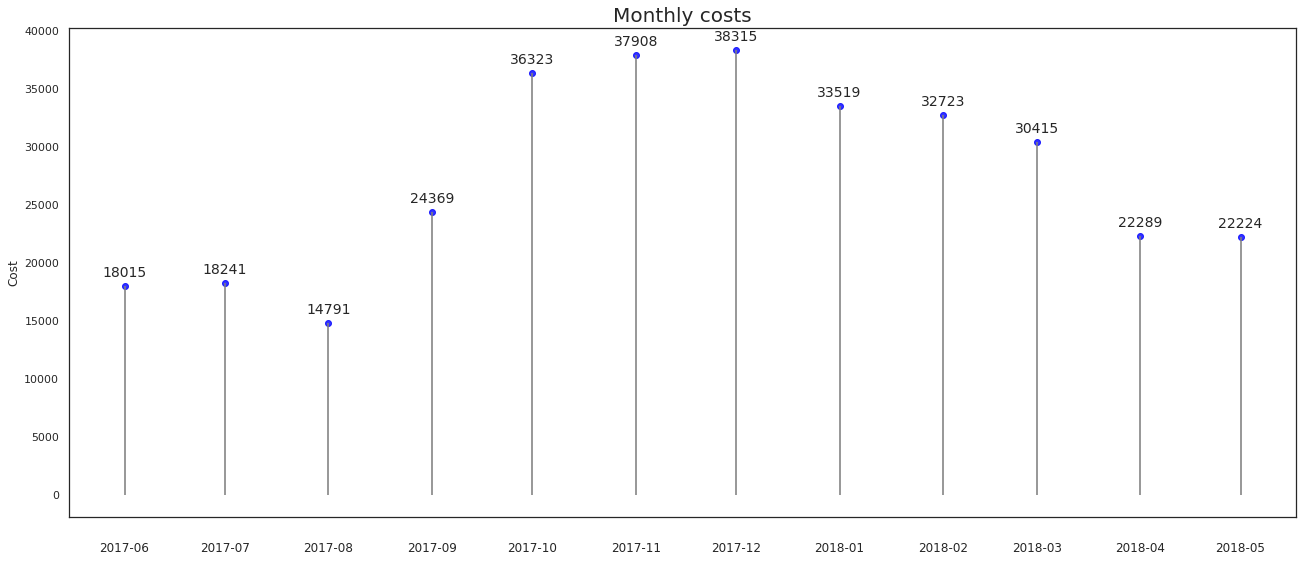

In [101]:
# graph:
fig , ax = plt.subplots(figsize=(22,9),facecolor='white')
ax.vlines(x=costs_per_month['month'],ymin=0,ymax=costs_per_month['costs'],colors='grey',alpha=0.8,linewidth = 2)
ax.scatter(x=costs_per_month['month'],y=costs_per_month['costs'],color='blue',alpha=0.8)
ax.set_title('Monthly costs',fontdict={'size':20})
ax.set_ylabel('Cost')
ax.set_xticks(costs_per_month['month'])
ax.set_xticklabels(costs_per_month['month'],rotation=0,fontdict={'size':12})
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("\n%Y-%m"))
for row in costs_per_month.itertuples():
  ax.text(row.month,row.costs+800,s=round(row.costs),fontdict={'rotation':0,'size':14,'ha':'center'})

- monthly costs increase can be a good sign in case that the activity is flourishes. increase started in 2017-09 till 2017-12
- costs declination can be a sign to either activity is going to shut or re-organization that impact the company in a good way

### cac + romi (roi)

__continue calculation of cac & romi:__

In [102]:
# total monthly costs:
monthly_costs = costs.groupby('month').sum()

In [103]:
# assign monthly_costs yable to existing report table per month.
# it is done in order to use the output variable in the appropriate way
report = pd.merge(report, monthly_costs, left_on='first_month_buy', right_on='month')

In [104]:
# customer acquisition cost per user
report['cac'] = report['costs'] / report['n_buyers']  # cac

In [105]:
# romi calculayion in order to get the return on investment per user
report['romi'] = report['ltv'] / report['cac'] # romi

In [106]:
# using pivot_table to sort new table with existing data:
output = report.pivot_table(
    index='first_month_buy', 
    columns='age', 
    values='romi', 
    aggfunc='mean').cumsum(axis=1).round(2)

In [107]:
output.fillna("")

age,0,1,2,3,4,5,6,7,8,9,10,11
first_month_buy,,,,,,,,,,,,
2017-06-01,0.21,0.23,0.25,0.3,0.34,0.38,0.42,0.44,0.47,0.5,0.52,0.53
2017-07-01,0.25,0.27,0.29,0.31,0.32,0.32,0.33,0.33,0.34,0.35,0.35,
2017-08-01,0.20,0.21,0.23,0.24,0.26,0.27,0.28,0.3,0.31,0.31,,
2017-09-01,0.24,0.29,0.31,0.48,0.49,0.52,0.55,0.56,0.57,,,
2017-10-01,0.24,0.26,0.27,0.28,0.29,0.29,0.3,0.3,,,,
2017-11-01,0.22,0.24,0.25,0.26,0.27,0.27,0.28,,,,,
2017-12-01,0.22,0.23,0.27,0.32,0.33,0.35,,,,,,
2018-01-01,0.17,0.18,0.19,0.2,0.2,,,,,,,
2018-02-01,0.19,0.2,0.2,0.2,,,,,,,,


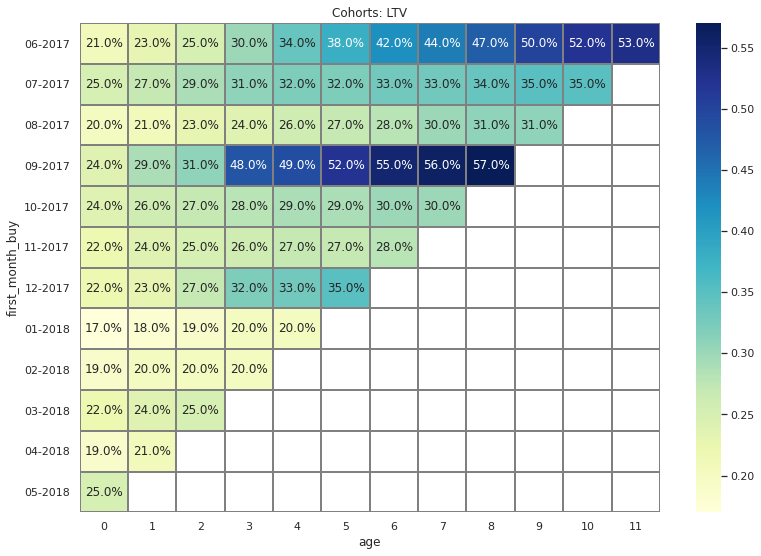

In [108]:
# heatmap:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: LTV')
sns.heatmap(output, annot=True, fmt='.1%', linewidths=1, linecolor='gray',
            cmap="YlGnBu",
            yticklabels=output.reset_index()['first_month_buy'].dt.strftime('%m-%Y'))

- none of the cohorts paid off
- unlike ltv result - when we take the costs in our calculation the picture looks different
- return on ivnestment is the most crucial KPI in any buissness

# Summary:
- In this analysis we started from the very first going deeper and deeper with each section
Our first intresting analysis was noticed when we created the graph showing us the distribution of users between desktop (pc) and touch (smartphones) where the trend was very simmiliar but the amounts of users was much higher with desktop rather than touch devices.
- continue with visits table we calculated retentions rates. retention rates are number of users (in reletive manners) when we tried to see for users behavior and when its changing. users behavior might be affected by many reasons like: seasonality which impact our buissness as more external references while bad traffic sources may indicate to internal references. in our project the retention rate that was divided by cohorts was not with figures we might expect from a prosperous buissness and was with low rates
- sales data gave us indications and was examined from sources point of view where we could easily notice for good sources with high traffic and also minor sources as well. sources 3 + 4 + 5 is the top 3 leaders & are considered as the main traffic sources
- next we jumped into ltv, cac and romi metric while romi is on top of this metrics because this one is very intrested by the investors and big figures on this part can make firm grow bigger and investors happy. on the downside - unporffitable organization can be closed over time when not showing gains with time. in Afisha although we had good ltv rate we were pritty dissapointed to acknowledge that the romi is low and the buissness seems to be not profitable from cohort to cohort. in top was reached to 50% at best when our aim is at least 100% (breakeven point)